In [32]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import PIL.Image
import seaborn as sns


from cifar_batch import Cifar10Batch
from models import TestModel
from utils import read_in_dict, read_labs, get_pics_preds, softmax, get_sorted_ser

from dataset import Pipeline, Dataset, DatasetIndex, B, V, C, F

In [2]:
%matplotlib inline

In [3]:
# size of cifar-10
SIZE = 50000

In [4]:
# setting up the index and the dataset
index = DatasetIndex(np.arange(SIZE))
cifarset = Dataset(index=index, batch_class=Cifar10Batch)
cifarset.cv_split(0.9)

In [5]:
# read cifar-10 dataset in dict
datadict = read_in_dict(src='D:/Work/OpenData/', components=['images', 'labels', 'picnames'])

In [6]:
testbatch = cifarset.test.p.load(fmt='ndarray', src=datadict).next_batch(500)

In [7]:
# labels
read_labs()

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Training pipeline

In [8]:
from dataset.dataset.models.tf import TFModel

In [9]:
# help(Pipeline.init_variables)

In [10]:
training = (cifarset.train.p
            .load(fmt='ndarray', src=datadict)
            .init_variables({'train_loss': dict(init=list), 'train_accuracy': dict(init=list)})
            .init_variables({'test_loss': dict(init=list), 'test_accuracy': dict(init=list)})
            .init_model('static', TestModel, 'My')
            .train_model('My',
                         feed_dict={'images': B('images'),
                                    'labels': B('labels')},
                         fetches=['loss', 'output_accuracy'],
                         save_to=[V('train_loss'), V('train_accuracy')],
                         mode='a')
            .predict_model('My',
                           feed_dict={'images': testbatch.images,
                                      'labels': testbatch.labels},
                           fetches=['loss', 'output_accuracy'],
                           save_to=[V('test_loss'), V('test_accuracy')],
                           mode='a')
           )

{'is_training': <tf.Tensor 'TestModel/globals/is_training:0' shape=<unknown> dtype=bool>, 'batch_norm': {'momentum': 0.1}, 'data_format': 'channels_last', 'layout': 'cap cnap ca', 'filters': [16, 32, 64], 'kernel_size': [5, 3, 3]}
filled args in body:  {'batch_norm': {'momentum': 0.1}, 'layout': 'cap cnap ca', 'filters': [16, 32, 64], 'kernel_size': [5, 3, 3], 'is_training': <tf.Tensor 'TestModel/globals/is_training:0' shape=<unknown> dtype=bool>, 'data_format': 'channels_last'}


In [11]:
import tensorflow as tf

In [12]:
genny = (cifarset >> training).gen_batch(batch_size=100, n_epochs=None)

### Training

In [23]:
N_ITER = 1000

In [24]:
for _ in tqdm_notebook(range(N_ITER)):
    bch = next(genny)

### Some beautiful plots

In [36]:
plt.style.use('ggplot')

In [37]:
test_accs = bch.pipeline.get_variable('test_accuracy')
test_loss = bch.pipeline.get_variable('test_loss')

In [48]:
csfont = {'fontname':'Comic Sans MS', 'fontsize': 15}
hfont = {'fontname':'Helvetica'}

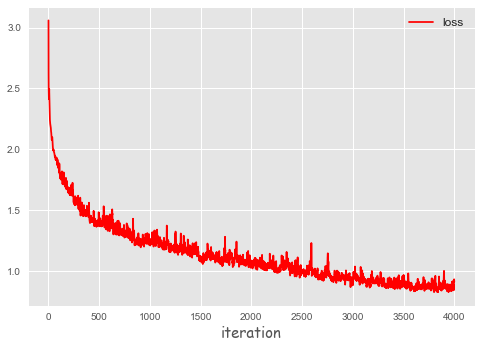

In [54]:
plt.plot(test_loss, color='r', label='loss')
#plt.title('Loss', **csfont)
plt.xlabel('iteration', **csfont)
plt.legend(fontsize=12)